In [1]:
import sys
import os
import pandas as pd

In [2]:
sys.path.append(os.path.abspath('../scripts'))

Read CSV files

In [3]:

credit_card_df = pd.read_csv('C:/Users/teeyob/EagleEye_Fraud_Detection/data/creditcard.csv')
fraud_df = pd.read_csv('C:/Users/teeyob/EagleEye_Fraud_Detection/data/Fraud_Data.csv')
ip_address_df = pd.read_csv('C:/Users/teeyob/EagleEye_Fraud_Detection/data/IpAddress_to_Country.csv')

In [4]:
credit_card_df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
ip_address_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


Check for missing values

In [7]:
missing_values = fraud_df.isnull().sum()
missing_values

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Check for duplicate rows

In [8]:
duplicate_count = fraud_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


Correct data types

In [9]:
from data_preprocessing import correct_data_types
fraud_df_cleaned = correct_data_types(fraud_df)
print("Data Types:\n", fraud_df_cleaned.dtypes)

Data Types:
 user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int32
device_id               category
source                  category
browser                 category
sex                     category
age                        int32
ip_address                 int32
class                      int64
dtype: object


Convert the IP ranges in ip_address_df

In [10]:
from data_preprocessing import convert_ip_to_int
ip_address_df_cleaned = convert_ip_to_int(ip_address_df)

Merge fraud data with the cleaned IP address data

In [11]:
from data_preprocessing import merge_ip_country

merged_fraud_df = merge_ip_country(fraud_df_cleaned, ip_address_df_cleaned)

print(merged_fraud_df.head())

Number of rows after merging and filtering: 148848
   user_id         signup_time       purchase_time  purchase_value  \
0   138208 2015-06-10 07:02:20 2015-07-21 02:03:53              20   
1   329438 2015-02-07 20:36:48 2015-02-28 21:43:52              18   
2   319411 2015-01-08 11:11:50 2015-03-06 23:37:00              36   
3    24894 2015-01-07 05:59:11 2015-01-07 05:59:12              35   
4   368181 2015-02-28 18:28:52 2015-03-06 16:32:41              35   

       device_id  source  browser sex  age  ip_address  class  \
0  ZINIADFCLHYPG  Direct       IE   M   38 -2147483648      0   
1  QSHYBRYJBNKMU     SEO       IE   M   24 -2147483648      0   
2  CJHWRXISOAYTL     SEO       IE   M   48 -2147483648      0   
3  NWREMPUXZSXWE     SEO  FireFox   F   46 -2147483648      1   
4  HNQIPDXVRNDZU  Direct   Chrome   M   29 -2147483648      0   

   lower_bound_ip_address  upper_bound_ip_address    country  
0             -2147483648             -2147483648  Singapore  
1          

 Feature Engineering with transaction frequency and velocity

In [12]:
from data_preprocessing import feature_engineering
fraud_df_fe = feature_engineering(merged_fraud_df) 
fraud_df_fe.head()
#fraud_df_fe.dtypes

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,time_to_purchase,hour_of_day,day_of_week,transaction_count,transaction_velocity
0,138208,2015-06-10 07:02:20,2015-07-21 02:03:53,20,ZINIADFCLHYPG,Direct,IE,M,38,-2147483648,0,-2147483648,-2147483648,Singapore,3524493.0,2,1,1,0.000006
1,329438,2015-02-07 20:36:48,2015-02-28 21:43:52,18,QSHYBRYJBNKMU,SEO,IE,M,24,-2147483648,0,-2147483648,-2147483648,Singapore,1818424.0,21,5,1,0.000010
2,319411,2015-01-08 11:11:50,2015-03-06 23:37:00,36,CJHWRXISOAYTL,SEO,IE,M,48,-2147483648,0,-2147483648,-2147483648,Singapore,4969510.0,23,4,1,0.000007
3,24894,2015-01-07 05:59:11,2015-01-07 05:59:12,35,NWREMPUXZSXWE,SEO,FireFox,F,46,-2147483648,1,-2147483648,-2147483648,Singapore,1.0,5,2,1,35.000000
4,368181,2015-02-28 18:28:52,2015-03-06 16:32:41,35,HNQIPDXVRNDZU,Direct,Chrome,M,29,-2147483648,0,-2147483648,-2147483648,Singapore,511429.0,16,4,1,0.000068


Encode categorical features

In [13]:
from data_preprocessing import encode_label_features
fraud_df_encoded= encode_label_features(fraud_df_fe)
fraud_df_encoded.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,time_to_purchase,hour_of_day,day_of_week,transaction_count,transaction_velocity
0,138208,2015-06-10 07:02:20,2015-07-21 02:03:53,20,132509,1,2,1,38,-2147483648,0,-2147483648,-2147483648,116,3524493.0,2,1,1,0.000006
1,329438,2015-02-07 20:36:48,2015-02-28 21:43:52,18,87274,2,2,1,24,-2147483648,0,-2147483648,-2147483648,116,1818424.0,21,5,1,0.000010
2,319411,2015-01-08 11:11:50,2015-03-06 23:37:00,36,12390,2,2,1,48,-2147483648,0,-2147483648,-2147483648,116,4969510.0,23,4,1,0.000007
3,24894,2015-01-07 05:59:11,2015-01-07 05:59:12,35,72228,2,1,0,46,-2147483648,1,-2147483648,-2147483648,116,1.0,5,2,1,35.000000
4,368181,2015-02-28 18:28:52,2015-03-06 16:32:41,35,39082,1,0,1,29,-2147483648,0,-2147483648,-2147483648,116,511429.0,16,4,1,0.000068


Normalize and scale numerical features

In [14]:
from data_preprocessing import normalize_and_scale
scaled_fraud_df = normalize_and_scale(fraud_df_encoded, ['purchase_value', 'age', 'time_to_purchase'])
scaled_fraud_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,time_to_purchase,hour_of_day,day_of_week,transaction_count,transaction_velocity
0,138208,2015-06-10 07:02:20,2015-07-21 02:03:53,-0.924042,132509,1,2,1,0.564192,-2147483648,0,-2147483648,-2147483648,116,-0.450381,2,1,1,0.000006
1,329438,2015-02-07 20:36:48,2015-02-28 21:43:52,-1.033250,87274,2,2,1,-1.060654,-2147483648,0,-2147483648,-2147483648,116,-0.996166,21,5,1,0.000010
2,319411,2015-01-08 11:11:50,2015-03-06 23:37:00,-0.050376,12390,2,2,1,1.724797,-2147483648,0,-2147483648,-2147483648,116,0.011891,23,4,1,0.000007
3,24894,2015-01-07 05:59:11,2015-01-07 05:59:12,-0.104980,72228,2,1,0,1.492676,-2147483648,1,-2147483648,-2147483648,116,-1.577893,5,2,1,35.000000
4,368181,2015-02-28 18:28:52,2015-03-06 16:32:41,-0.104980,39082,1,0,1,-0.480352,-2147483648,0,-2147483648,-2147483648,116,-1.414283,16,4,1,0.000068


Univariate Analysis

In [15]:
from EDA import univariate_analysis
univariate_analysis(fraud_df_cleaned, ['signup_time', 'purchase_time', 'purchase_value', 'age'])

Summary statistics for signup_time:
  Statistic                    signup_time
0     count                         151112
1      mean  2015-04-20 00:56:09.511329280
2       min            2015-01-01 00:00:42
3       25%     2015-02-18 09:52:48.500000
4       50%            2015-04-19 04:41:30
5       75%  2015-06-18 14:47:22.750000128
6       max            2015-08-18 04:40:29 

Summary statistics for purchase_time:
  Statistic                  purchase_time
0     count                         151112
1      mean  2015-06-16 02:56:38.759952896
2       min            2015-01-01 00:00:44
3       25%     2015-04-18 14:41:25.500000
4       50%     2015-06-18 13:46:17.500000
5       75%     2015-08-17 18:48:31.500000
6       max            2015-12-16 02:56:05 

Summary statistics for purchase_value:
  Statistic  purchase_value
0     count   151112.000000
1      mean       36.935372
2       std       18.322762
3       min        9.000000
4       25%       22.000000
5       50%       35.000000

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Bivariate Analysis

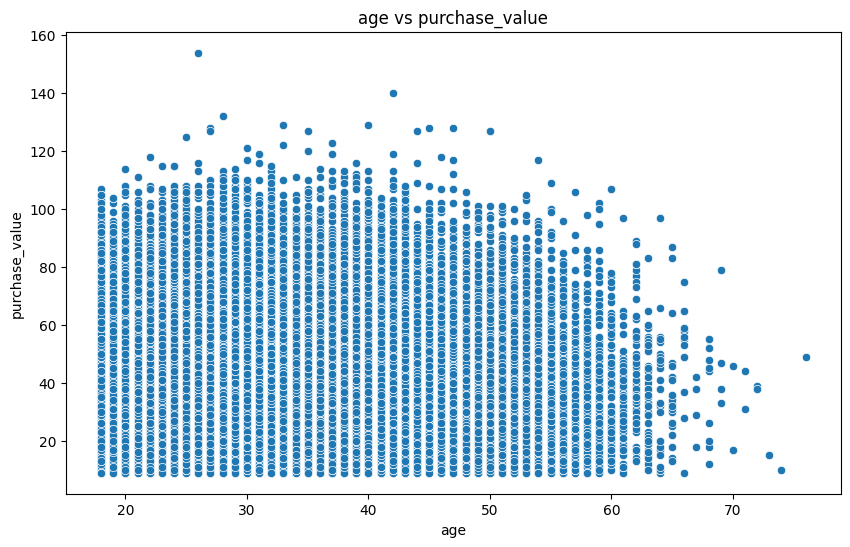

In [16]:
from EDA import bivariate_analysis
bivariate_analysis(fraud_df_cleaned, 'age', 'purchase_value')

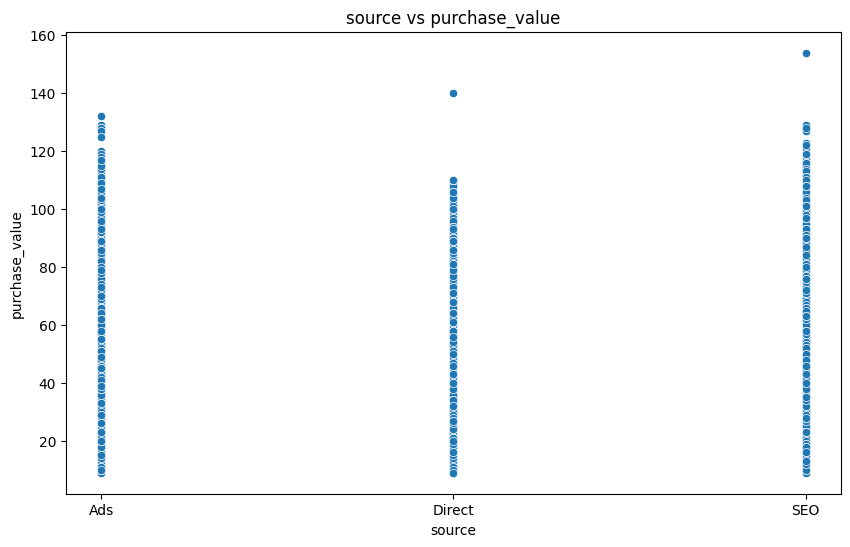

In [17]:
bivariate_analysis(fraud_df_cleaned, 'source', 'purchase_value')

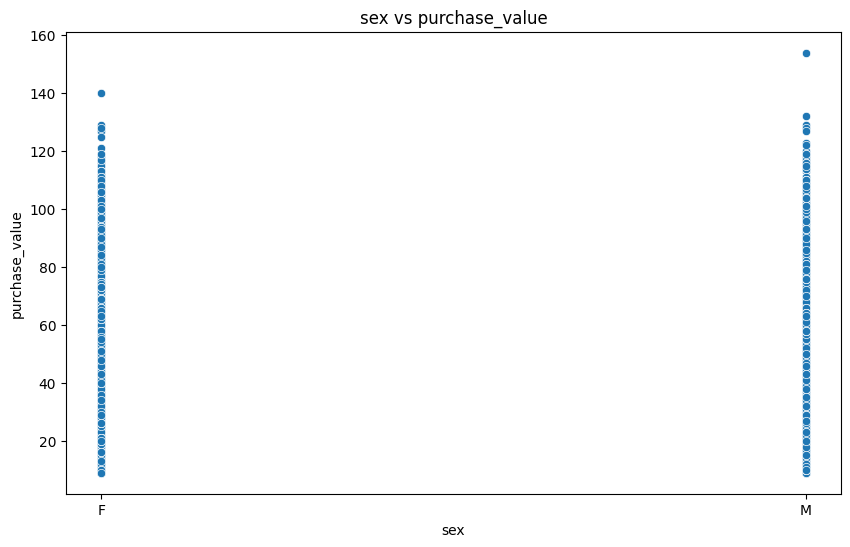

In [18]:
bivariate_analysis(fraud_df_cleaned, 'sex', 'purchase_value')

In [19]:
scaled_fraud_df.to_csv('merged_fraud_data.csv', index=False)

In [20]:
scaled_fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,time_to_purchase,hour_of_day,day_of_week,transaction_count,transaction_velocity
0,138208,2015-06-10 07:02:20,2015-07-21 02:03:53,-0.924042,132509,1,2,1,0.564192,-2147483648,0,-2147483648,-2147483648,116,-0.450381,2,1,1,0.000006
1,329438,2015-02-07 20:36:48,2015-02-28 21:43:52,-1.033250,87274,2,2,1,-1.060654,-2147483648,0,-2147483648,-2147483648,116,-0.996166,21,5,1,0.000010
2,319411,2015-01-08 11:11:50,2015-03-06 23:37:00,-0.050376,12390,2,2,1,1.724797,-2147483648,0,-2147483648,-2147483648,116,0.011891,23,4,1,0.000007
3,24894,2015-01-07 05:59:11,2015-01-07 05:59:12,-0.104980,72228,2,1,0,1.492676,-2147483648,1,-2147483648,-2147483648,116,-1.577893,5,2,1,35.000000
4,368181,2015-02-28 18:28:52,2015-03-06 16:32:41,-0.104980,39082,1,0,1,-0.480352,-2147483648,0,-2147483648,-2147483648,116,-1.414283,16,4,1,0.000068
